### Import Libraries

In [50]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score,r2_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import  classification_report, confusion_matrix

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC



### Loading the dataset

In [51]:
#import train and test CSV files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### EDA --> Exploratory Data Analysis

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
print (test.shape)
print (train.shape)

(418, 11)
(891, 12)


In [56]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
train.duplicated().sum()

0

In [59]:
# find if we have a null value in train data
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
# find if we have a null value in test data
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [61]:
# The number of men who survived
train[train['Sex']=='male']['Survived'].sum()

109

In [62]:
# The number of women who survived
train[train['Sex']=='female']['Survived'].sum()

233

In [63]:
cal_rest = train.groupby('Survived')['Survived'].count()
print('Number of passengers survived and no of passengers did not')
print(cal_rest.tail())

Number of passengers survived and no of passengers did not
Survived
0    549
1    342
Name: Survived, dtype: int64


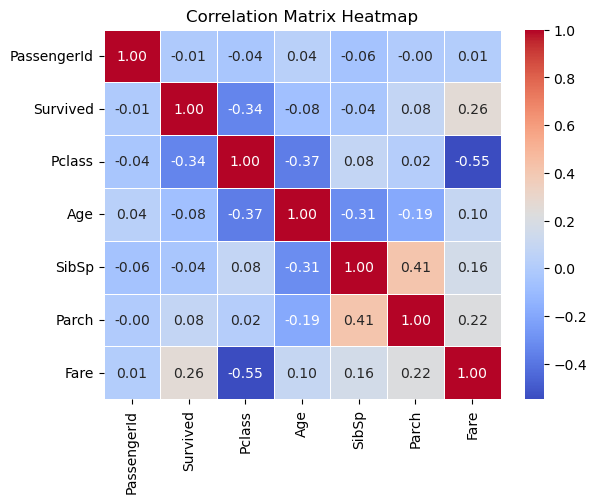

In [64]:
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Data Visualization

Sex


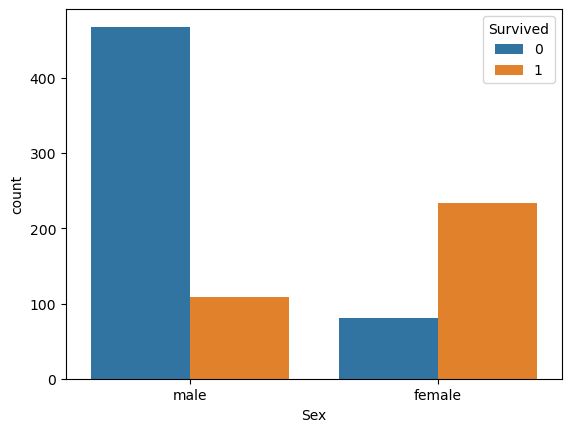


Embarked


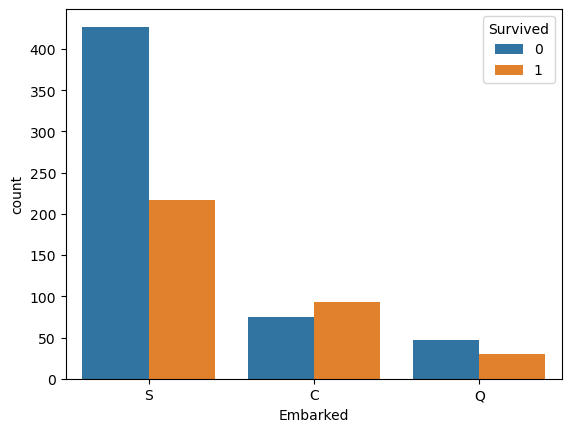


Pclass


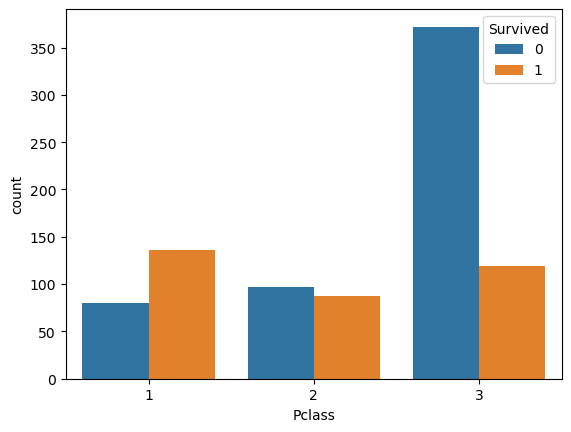


SibSp


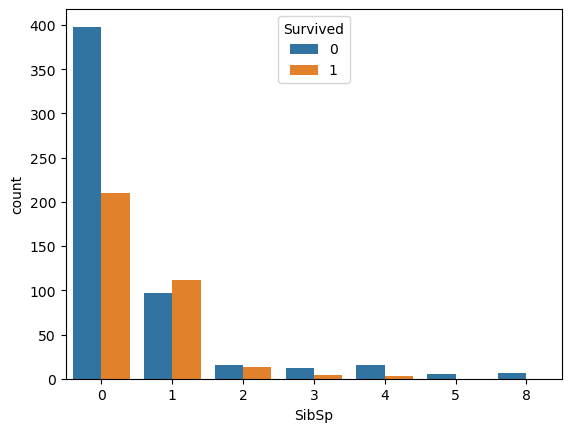


Parch


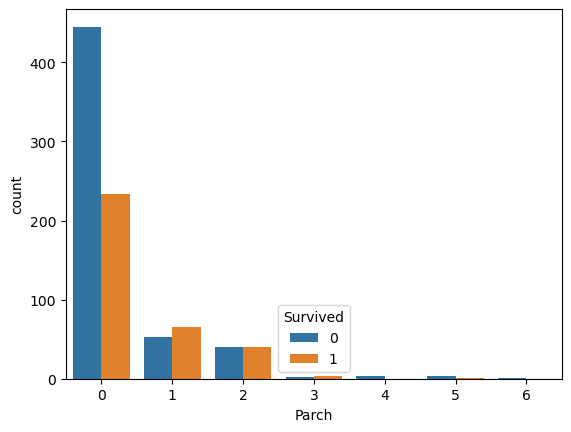

In [65]:
for column_name in ['Sex','Embarked','Pclass', 'SibSp', 'Parch']:
    print(column_name)
    sns.countplot(data=train, x=column_name, hue='Survived')
    plt.show()
    print("")

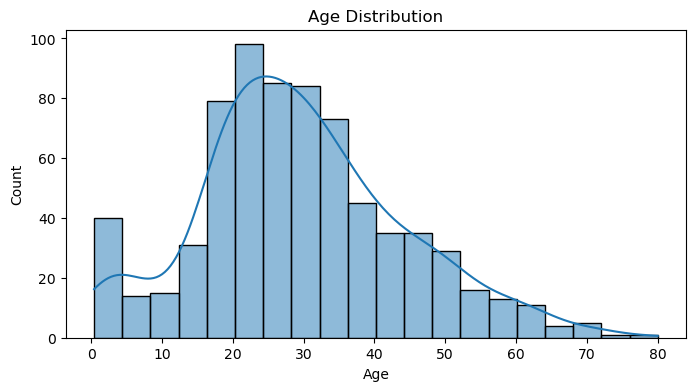

In [66]:
# Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(train['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

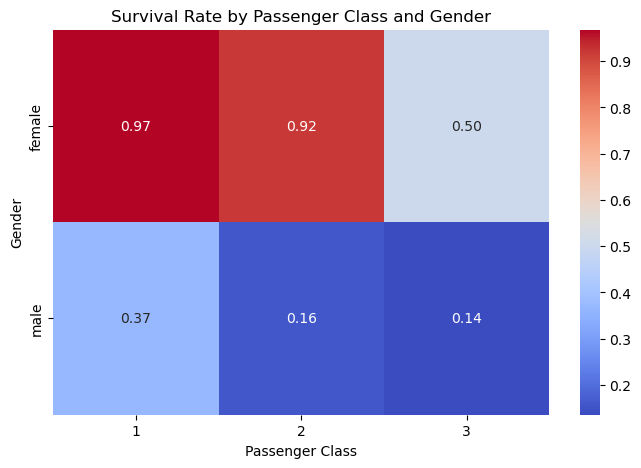

In [67]:
pivot_table = train.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean')
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Gender')
plt.show()

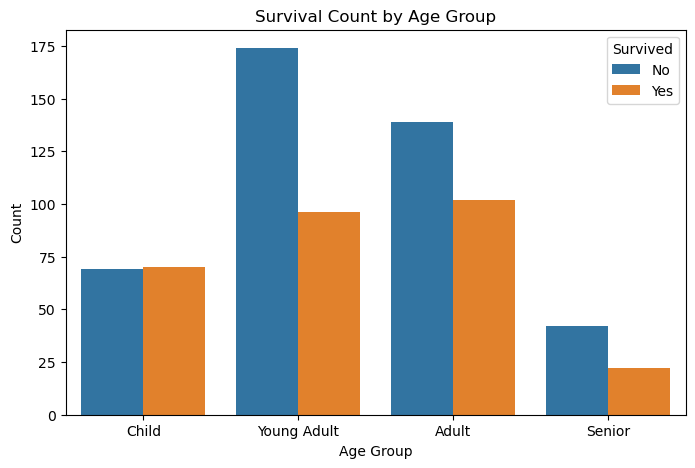

In [68]:
age_bins = [0, 18, 30, 50, 100]
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']
train['Age_Group'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels)
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Group', hue='Survived', data=train)
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### Clean the data

In [69]:
# drop Cabin column
train.drop('Cabin', axis=1, inplace=True)

In [70]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [71]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age_Group      177
dtype: int64

In [72]:
# fill the missing value in Embarked column 
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [73]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Age_Group      177
dtype: int64

In [74]:
# calculate the mean age of male passengers in the 'train_df' dataset.
mean_male = train[train['Sex']=='male']['Age'].mean()
mean_male

30.50582424304206

In [75]:
# calculate the mean age of male passengers in the 'train' dataset.
mean_female = train[train['Sex']=='female']['Age'].mean()
mean_female

28.216730048707397

In [76]:
# fillna' function is used to fill the missing values in the 'Age' column of male and female passengers with the value of 'mean_male' and 'mean_female' respectively.
train.loc[train['Sex']=='male', 'Age'] = train[train['Sex']=='male']['Age'].fillna(value=mean_male)
train.loc[train['Sex']=='female', 'Age'] = train[train['Sex']=='female']['Age'].fillna(value=mean_female)

In [77]:
# drop age_group column
train.drop('Age_Group', axis=1, inplace=True)

In [78]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [79]:
from sklearn.ensemble import RandomForestClassifier

#data["Age"] = data["Age"].astype(int)
#if ["Age"]

y = train["Survived"]

features = ["Pclass", "Sex"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
# Dropping some unimportant features
train.drop(['PassengerId','SibSp','Parch','Ticket','Name'], axis=1, inplace= True)

In [35]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [36]:
train.replace({'female':0,'male':1}, inplace=True)

In [37]:
train = pd.get_dummies(train,columns=['Embarked'], prefix='Embarked')

In [38]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,0,0,1
1,1,1,0,38.0,71.2833,1,0,0
2,1,3,0,26.0,7.9250,0,0,1
3,1,1,0,35.0,53.1000,0,0,1
4,0,3,1,35.0,8.0500,0,0,1


### split train data

In [39]:
# split data into x and y
x = train.drop('Survived',axis =1)
y = train['Survived']
x

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.000000,7.2500,0,0,1
1,1,0,38.000000,71.2833,1,0,0
2,3,0,26.000000,7.9250,0,0,1
3,1,0,35.000000,53.1000,0,0,1
4,3,1,35.000000,8.0500,0,0,1
...,...,...,...,...,...,...,...
886,2,1,27.000000,13.0000,0,0,1
887,1,0,19.000000,30.0000,0,0,1
888,3,0,29.699118,23.4500,0,0,1
889,1,1,26.000000,30.0000,1,0,0


In [40]:
# Select numerical columns
num_cols = ['Age', 'Fare']

# Create scaler object
scaler = StandardScaler()

# Fit scaler on selected columns
scaler.fit(x[num_cols])

# Transform selected columns with scaler
x[num_cols] = scaler.transform(x[num_cols])

In [41]:
# split train data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

### Modeling

In [42]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier()

    
}

# Train and evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} accuracy: {scores.mean():.3f} +/- {scores.std():.3f}")
    
    # Fit the model to the full training set and make predictions on the test set
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Evaluate the model on the test set
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-score: {f1:.3f}")
    print()

Logistic Regression accuracy: 0.779 +/- 0.036
Accuracy: 0.827
Precision: 0.746
Recall: 0.758
F1-score: 0.752

Decision Tree accuracy: 0.768 +/- 0.037
Accuracy: 0.788
Precision: 0.688
Recall: 0.710
F1-score: 0.698

Random Forest accuracy: 0.812 +/- 0.024
Accuracy: 0.810
Precision: 0.733
Recall: 0.710
F1-score: 0.721

SVM accuracy: 0.778 +/- 0.025
Accuracy: 0.827
Precision: 0.772
Recall: 0.710
F1-score: 0.739

GradientBoostingClassifier accuracy: 0.813 +/- 0.033
Accuracy: 0.838
Precision: 0.811
Recall: 0.694
F1-score: 0.748

AdaBoostClassifier accuracy: 0.789 +/- 0.040
Accuracy: 0.844
Precision: 0.743
Recall: 0.839
F1-score: 0.788



**TEST DATA**

In [43]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
# fill the null value that in the age column
mean_male_test = test[test['Sex']=='male']['Age'].mean()
mean_female_test = test[test['Sex']=='female']['Age'].mean()
test.loc[test['Sex']=='male', 'Age'] = test[test['Sex']=='male']['Age'].fillna(value=mean_male_test)
test.loc[test['Sex']=='female', 'Age'] = test[test['Sex']=='female']['Age'].fillna(value=mean_female_test)

# fill the null values that in the Fare column
test['Fare'].fillna(test['Fare'].median(), inplace = True)

# Dropping some unimportant features
test.drop(['PassengerId','SibSp','Parch','Ticket','Cabin','Name'], axis=1, inplace= True)

In [45]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [46]:
# convert string values to numeric by replace the female and male by 0 and 1
test.replace({'female':0,'male':1},inplace=True)

# using one hot encoder to convertr str values 
test = pd.get_dummies(test,columns=['Embarked'],prefix='Embarked')

# Predictions

In [47]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.30907085745795426
